In [170]:
import numpy as np

T_log = np.load("/home/ratiomiith/Development/DigitCloth/experiments/data/T_log_exp_odometer_20230523-220951.npy")
T_log_2 = np.load("/home/ratiomiith/Development/DigitCloth/experiments/data/T_log_exp_odometer_20230523-221417.npy")
T_log_3 = np.load("/home/ratiomiith/Development/DigitCloth/experiments/data/T_log_exp_odometer_20230523-222147.npy")
Robot_log = np.loadtxt("/home/ratiomiith/Development/DigitCloth/experiments/data/X_log_exp_odometer_20230523_220951.csv",delimiter=',',dtype=str)
Robot_log_2 = np.loadtxt("/home/ratiomiith/Development/DigitCloth/experiments/data/X_log_exp_odometer_20230523_221417.csv",delimiter=',',dtype=str)
Robot_log_3 = np.loadtxt("/home/ratiomiith/Development/DigitCloth/experiments/data/X_log_exp_odometer_20230523_222147.csv",delimiter=',',dtype=str)
X_log = T_log[:,0]
X_log_2 = T_log_2[:,0]
X_log_3 = T_log_3[:,0]
Robot_X_log = Robot_log[:,1].astype(np.float32) * 1000
Robot_X_log_2 = Robot_log_2[:,1].astype(np.float32) * 1000
Robot_X_log_3 = Robot_log_3[:,1].astype(np.float32) * 1000

In [171]:
# T_log
# Robot_log
# Robot_X_log
len(T_log), len(Robot_log)
len(T_log_2), len(Robot_log_2)
len(T_log_3), len(Robot_log_3)
Robot_X_log = np.delete(Robot_X_log, 0)
X_log_3 = np.delete(X_log_3, 0)

X_0 = X_log[0]
Robot_X_0 = Robot_X_log[0]
for i in range(len(X_log)):
    X_log[i] = X_log[i] - X_0
    Robot_X_log[i] = Robot_X_log[i] - Robot_X_0
X_0 = X_log_2[0]
Robot_X_0 = Robot_X_log_2[0]
for i in range(len(X_log_2)):
    X_log_2[i] = X_log_2[i] - X_0
    Robot_X_log_2[i] = Robot_X_log_2[i] - Robot_X_0
X_0 = X_log_3[0]
Robot_X_0 = Robot_X_log_3[0]
for i in range(len(X_log_3)):
    X_log_3[i] = X_log_3[i] - X_0
    Robot_X_log_3[i] = Robot_X_log_3[i] - Robot_X_0

for i in range(len(Robot_X_log)):
    if i > 48:
        Robot_X_log[i] = Robot_X_log[i] + 0.00001
        if Robot_X_log[i] < 0:
            X_log = X_log[0 : i + 5]
            Robot_X_log = Robot_X_log[0 : i + 5]
            break

for i in range(len(Robot_X_log_2)):
    if i > 62:
        Robot_X_log_2[i] = Robot_X_log_2[i] + 0.00001
        if Robot_X_log_2[i] < 0:
            X_log_2 = X_log_2[0 : i + 5]
            Robot_X_log_2 = Robot_X_log_2[0 : i + 5]
            break

for i in range(len(Robot_X_log_3)):
    if i > 73:
        Robot_X_log_3[i] = Robot_X_log_3[i] + 0.00001
        if Robot_X_log_3[i] < 0:
            X_log_3 = X_log_3[0 : i + 5]
            Robot_X_log_3 = Robot_X_log_3[0 : i + 5]
            break

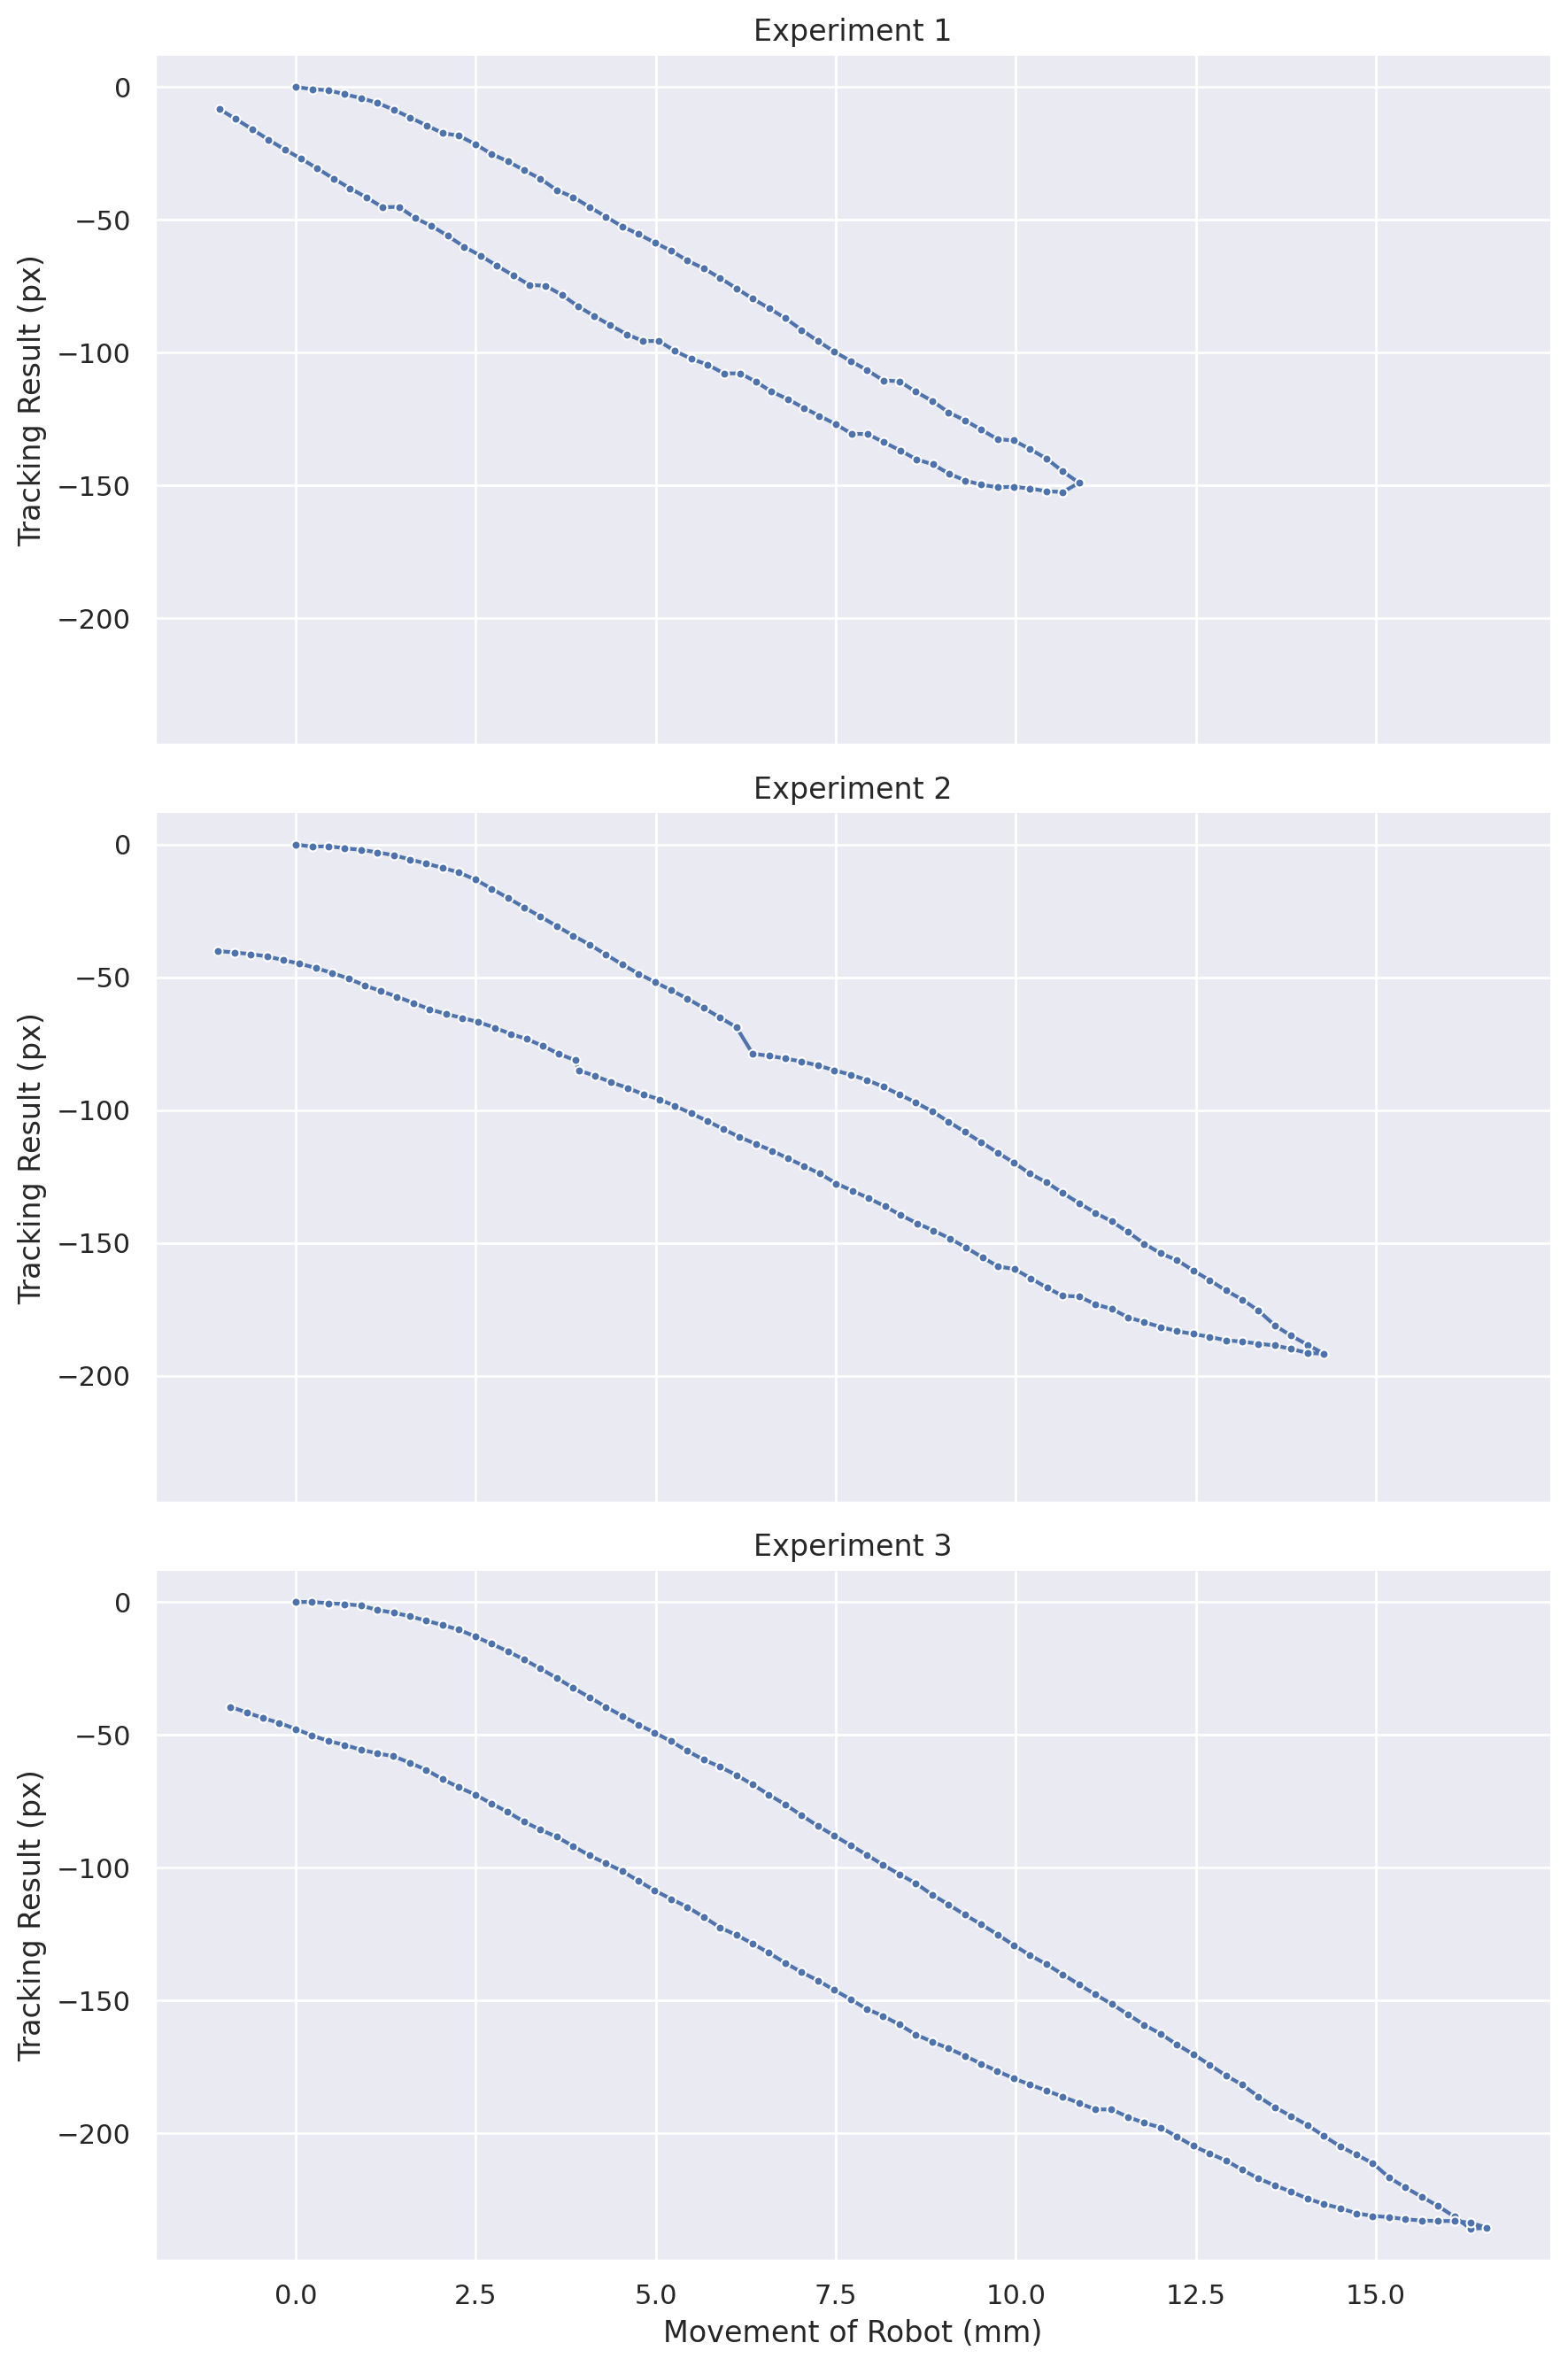

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()

%config InlineBackend.figure_format = 'retina'

# plt.figure(figsize=(10, 8))
# plt.xlabel("Movement of Robot (mm)")
# plt.ylabel("Tracking Result (px)")
# plt.title("Tracking Result vs Movement of Robot")

# sns.lineplot(x=Robot_X_log, y=X_log, sort=False, marker="o", label="1st Experiment", markersize=3.6)
# sns.lineplot(x=Robot_X_log_2, y=X_log_2, sort=False, marker="o", label="2nd Experiment", markersize=3.6)
# sns.lineplot(x=Robot_X_log_3, y=X_log_3, sort=False, marker="o", label="3rd Experiment", markersize=3.6)
# turn all 3 lines into one pd dataframe for facet grid
df = pd.DataFrame({'x': np.concatenate((Robot_X_log, Robot_X_log_2, Robot_X_log_3)), 'y': np.concatenate((X_log, X_log_2, X_log_3)), 'exp': np.int0(np.concatenate((np.ones(len(Robot_X_log)), 2*np.ones(len(Robot_X_log_2)), 3*np.ones(len(Robot_X_log_3)))))})
grid = sns.FacetGrid(df, row = "exp", height=4.5, aspect=2)
grid.map(sns.lineplot, "x", "y", sort=False, marker="o", markersize=3.6)
grid.fig.tight_layout(w_pad=1.5)
grid.set_xlabels("Movement of Robot (mm)")
grid.set_ylabels("Tracking Result (px)")
grid.set_titles("Experiment {row_name}")
plt.savefig("Tracking Result vs Movement of Robot.png", dpi=300)

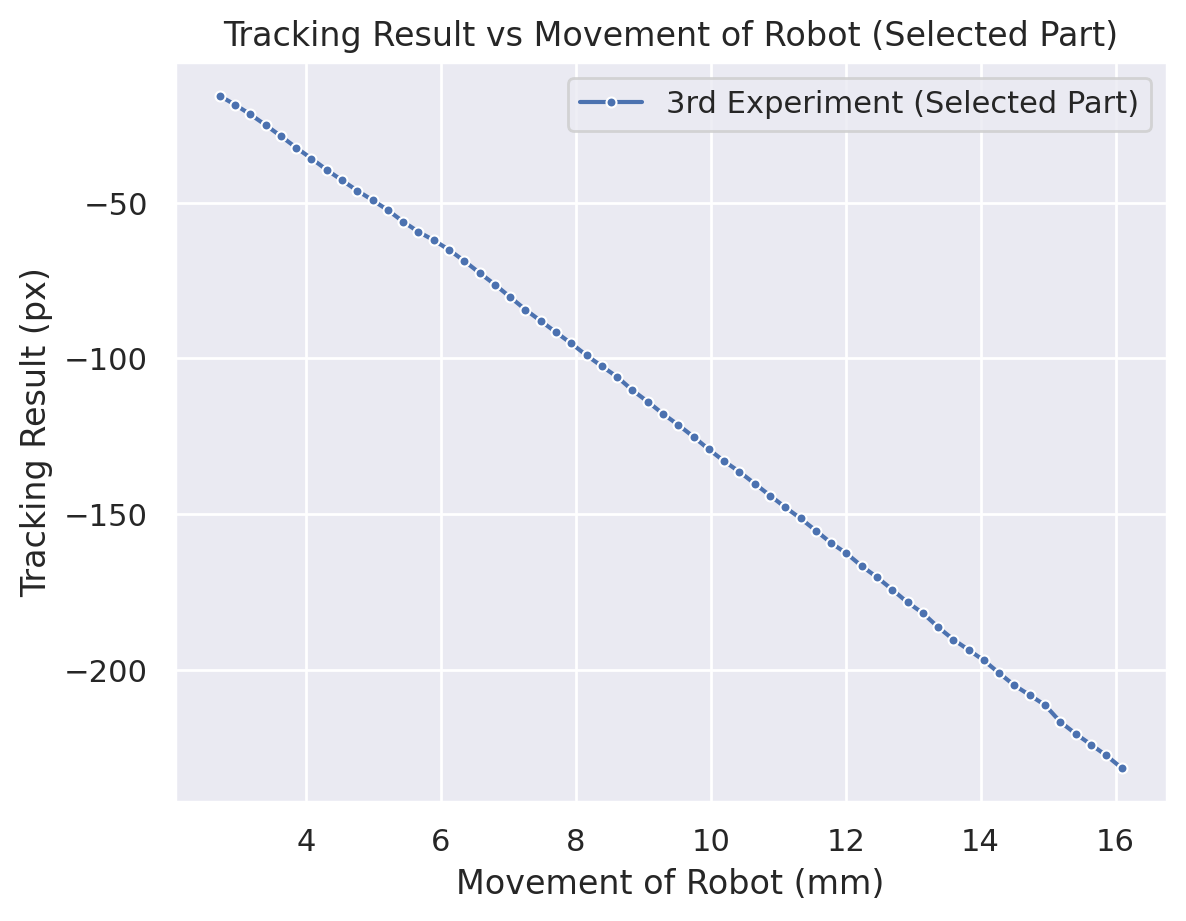

In [173]:
X_selected = X_log_3[12:72]
Robot_X_selected = Robot_X_log_3[12:72]
plt.title("Tracking Result vs Movement of Robot (Selected Part)")
plt.xlabel("Movement of Robot (mm)")
plt.ylabel("Tracking Result (px)")
sns.lineplot(x=Robot_X_selected, y=X_selected, sort=False, marker="o", label="3rd Experiment (Selected Part)", markersize=3.6)
plt.savefig("Tracking Result vs Movement of Robot (Selected Part).png", dpi=300)

[[-16.281776]]


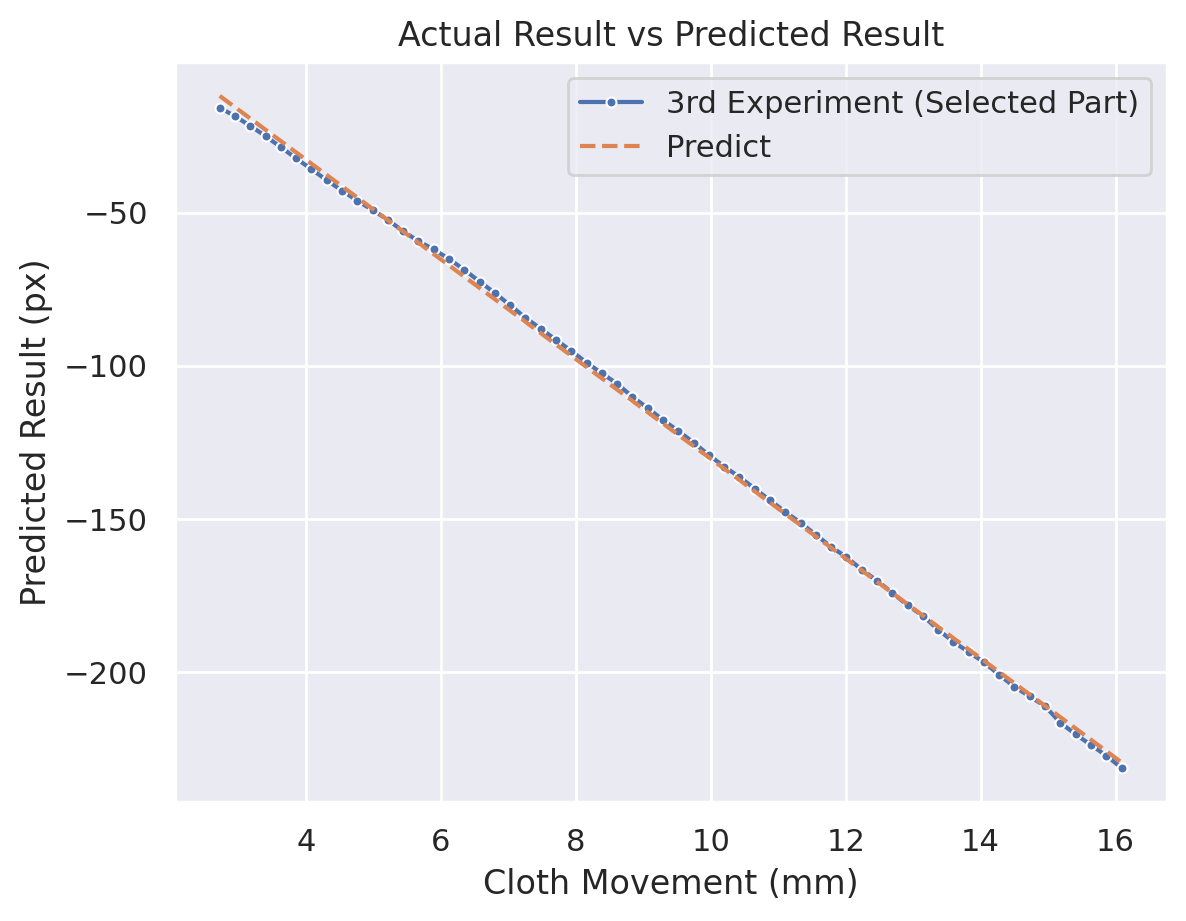

In [174]:
# linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(np.array(Robot_X_selected).reshape(-1, 1), np.array(X_selected).reshape(-1, 1))
reg.predict(np.array(Robot_X_selected).reshape(-1, 1))
plt.title("Actual Result vs Predicted Result")
plt.xlabel("Cloth Movement (mm)")
plt.ylabel("Predicted Result (px)")
sns.lineplot(
    x=Robot_X_selected,
    y=X_selected,
    sort=False,
    marker="o",
    label="3rd Experiment (Selected Part)",
    markersize=3.6,
)
sns.lineplot(
    x=Robot_X_selected, y=reg.predict(np.array(Robot_X_selected).reshape(-1, 1)).reshape(-1), label="Predict",linestyle='--'
)
plt.savefig("Actual Result vs Predicted Result.png", dpi=300)
print(reg.coef_) # 

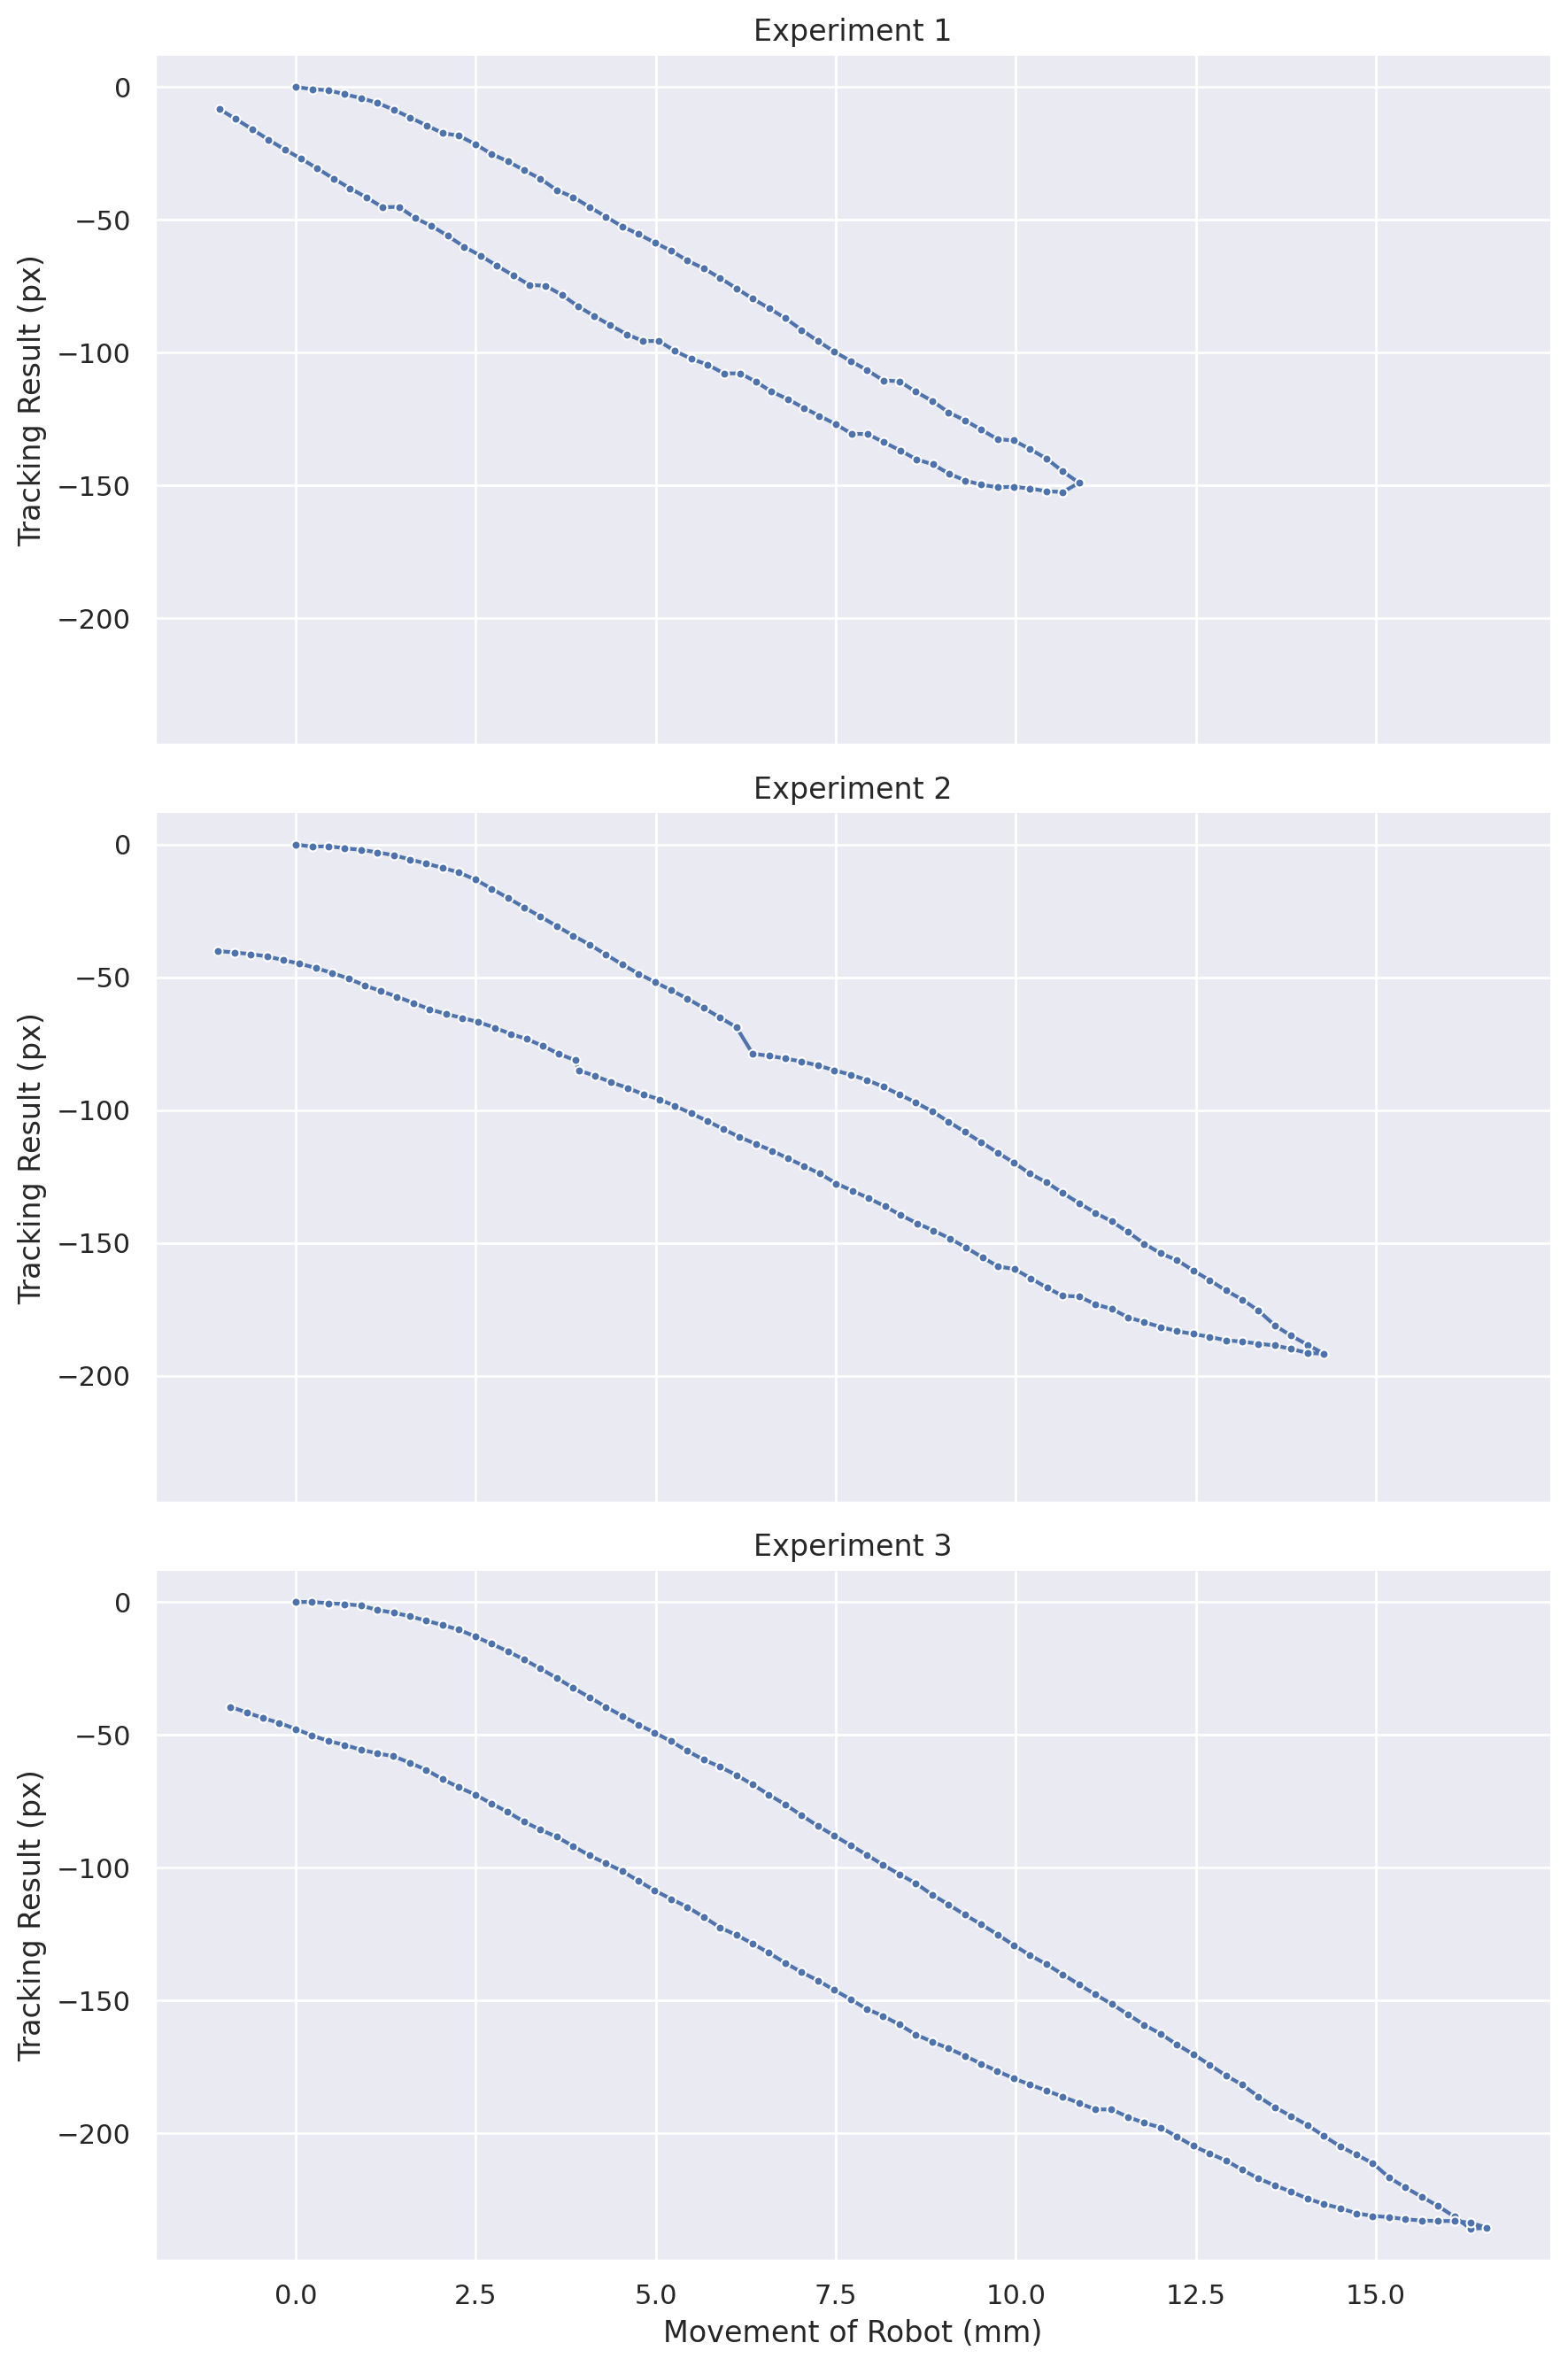

In [175]:
df = pd.DataFrame({'x': np.concatenate((Robot_X_log, Robot_X_log_2, Robot_X_log_3)), 'y': np.concatenate((X_log, X_log_2, X_log_3)), 'exp': np.int0(np.concatenate((np.ones(len(Robot_X_log)), 2*np.ones(len(Robot_X_log_2)), 3*np.ones(len(Robot_X_log_3)))))})
coef = -16.2818
X_selected_1_f = X_log_1[] # TODO: select the part of the data that is linear and use it to predict the rest
X_selected_1_b = X_log_1[]
X_selected_2_f = X_log_2[12:72]
X_selected_2_b = X_log_2[12:72]
X_selected_3_f = X_log_3[12:72]
X_selected_3_b = X_log_3[12:72]
grid = sns.FacetGrid(df, row = "exp", height=4.5, aspect=2)
grid.map(sns.lineplot, "x", "y", sort=False, marker="o", markersize=3.6)
for row_val, ax in grid.axes_dict.items():
    if row_val == 0:
        ax.plot(Robot_X_selected, reg.predict(np.array(Robot_X_selected).reshape(-1, 1)).reshape(-1), label="Predict",linestyle='--')
grid.fig.tight_layout(w_pad=1.5)
grid.set_xlabels("Movement of Robot (mm)")
grid.set_ylabels("Tracking Result (px)")
grid.set_titles("Experiment {row_name}")
plt.savefig("Tracking Result vs Movement of Robot.png", dpi=300)

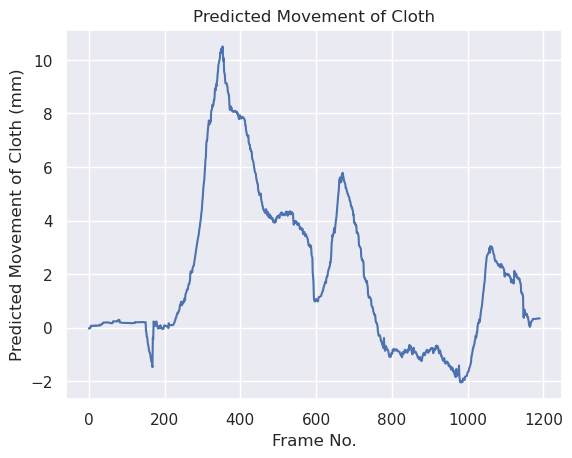

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

T_log = np.load("/home/ratiomiith/Development/DigitCloth/output/T_log_exp_odometer_20230524-231657_test.npy")/16.2818

plt.plot(range(len(T_log)), T_log[:, 0], label="x")
plt.xlabel("Frame No.")
plt.ylabel("Predicted Movement of Cloth (mm)")
plt.title("Predicted Movement of Cloth")
plt.savefig("Predicted Movement of Cloth.png", dpi=300)